<a href="https://colab.research.google.com/github/M-Sparsh-Mehra/email-phishing/blob/main/email_phishing_with_oversampling_methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LIBRARIES

In [ ]:
import numpy as np
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sns

# DATASET

In [ ]:
data=pd.read_csv("/content/email_phishing_data.csv")

In [ ]:
data

,num_words,num_unique_words,num_stopwords,num_links,num_unique_domains,num_email_addresses,num_spelling_errors,num_urgent_keywords,label
0,140,94,52,0,0,0,0,0,0
1,5,5,1,0,0,0,0,0,0
2,34,32,15,0,0,0,0,0,0
3,6,6,2,0,0,0,0,0,0
4,9,9,2,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
524841,782,327,301,2,2,2,52,1,0
524842,36,30,11,0,0,0,4,0,1
524843,61,46,11,0,0,0,3,0,0
524844,213,136,89,0,0,0,18,0,0


# EDA

In [ ]:
data.describe()

,num_words,num_unique_words,num_stopwords,num_links,num_unique_domains,num_email_addresses,num_spelling_errors,num_urgent_keywords,label
count,5.248460e+05,524846.000000,524846.000000,524846.000000,524846.000000,524846.000000,524846.000000,524846.000000,524846.000000
mean,2.762280e+02,123.012167,80.045465,0.895588,0.347767,2.114897,24.694731,0.245301,0.013240
std,3.335457e+03,201.626478,1023.330380,5.603001,1.774209,13.592682,311.312358,0.559320,0.114301
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.700000e+01,38.000000,12.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,1.200000e+02,79.000000,34.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000
75%,2.690000e+02,145.000000,79.000000,0.000000,0.000000,1.000000,22.000000,0.000000,0.000000
max,2.339682e+06,51251.000000,720411.000000,824.000000,524.000000,1150.000000,190104.000000,7.000000,1.000000


## HISTOGRAMS

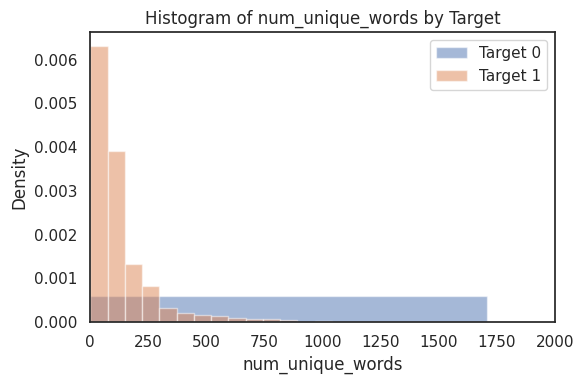

In [ ]:
column = 'num_unique_words'

mp.figure(figsize=(6, 4))
mp.xlim(0,2000)
mp.hist(data[data['label'] == 0][column], bins=30, alpha=0.5, label='Target 0', density=True)
mp.hist(data[data['label'] == 1][column], bins=30, alpha=0.5, label='Target 1', density=True)
mp.title(f'Histogram of {column} by Target')
mp.xlabel(column)
mp.ylabel('Density')
mp.legend()
mp.tight_layout()
mp.show()

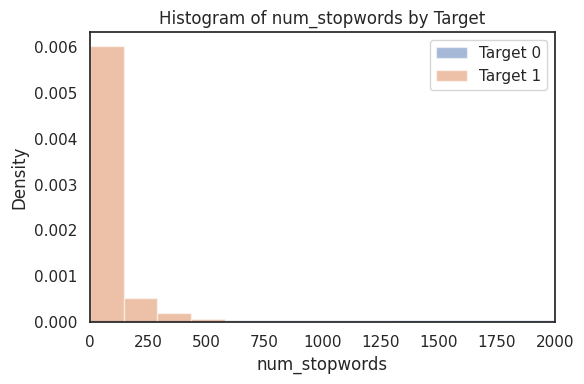

In [ ]:
column = 'num_stopwords'

mp.figure(figsize=(6, 4))
mp.xlim(0,2000)
mp.hist(data[data['label'] == 0][column], bins=30, alpha=0.5, label='Target 0', density=True)
mp.hist(data[data['label'] == 1][column], bins=30, alpha=0.5, label='Target 1', density=True)
mp.title(f'Histogram of {column} by Target')
mp.xlabel(column)
mp.ylabel('Density')
mp.legend()
mp.tight_layout()
mp.show()

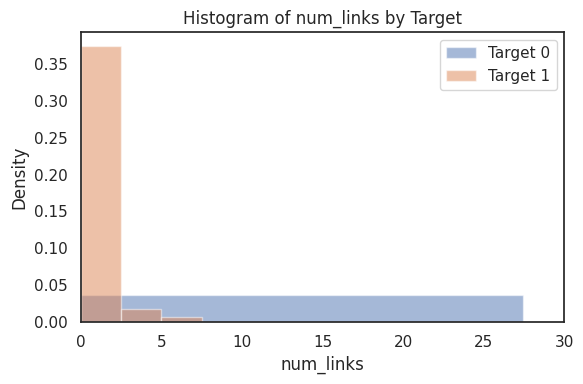

In [ ]:
column = 'num_links'

mp.figure(figsize=(6, 4))
mp.xlim(0,30)
mp.hist(data[data['label'] == 0][column], bins=30, alpha=0.5, label='Target 0', density=True)
mp.hist(data[data['label'] == 1][column], bins=30, alpha=0.5, label='Target 1', density=True)
mp.title(f'Histogram of {column} by Target')
mp.xlabel(column)
mp.ylabel('Density')
mp.legend()
mp.tight_layout()
mp.show()

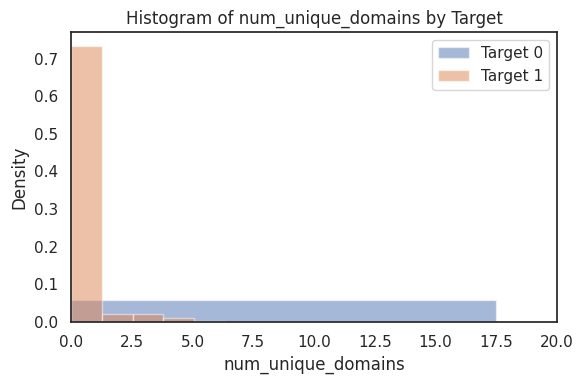

In [ ]:
column = 'num_unique_domains'

mp.figure(figsize=(6, 4))
mp.xlim(0,20)
mp.hist(data[data['label'] == 0][column], bins=30, alpha=0.5, label='Target 0', density=True)
mp.hist(data[data['label'] == 1][column], bins=30, alpha=0.5, label='Target 1', density=True)
mp.title(f'Histogram of {column} by Target')
mp.xlabel(column)
mp.ylabel('Density')
mp.legend()
mp.tight_layout()
mp.show()

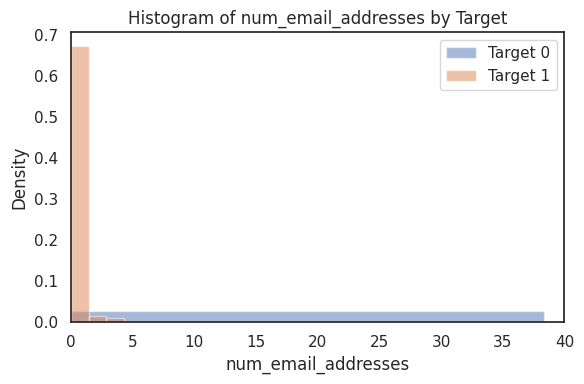

In [ ]:
column = 'num_email_addresses'

mp.figure(figsize=(6, 4))
mp.xlim(0,40)
mp.hist(data[data['label'] == 0][column], bins=30, alpha=0.5, label='Target 0', density=True)
mp.hist(data[data['label'] == 1][column], bins=30, alpha=0.5, label='Target 1', density=True)
mp.title(f'Histogram of {column} by Target')
mp.xlabel(column)
mp.ylabel('Density')
mp.legend()
mp.tight_layout()
mp.show()

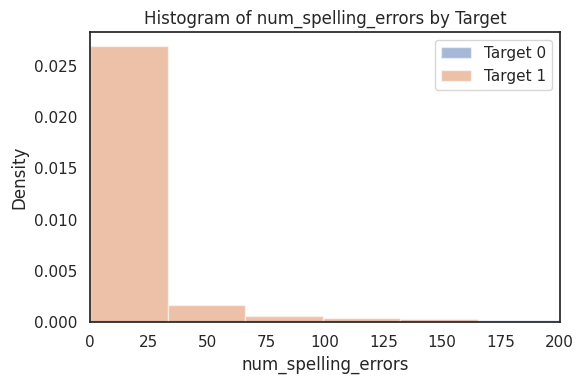

In [ ]:
column = 'num_spelling_errors'

mp.figure(figsize=(6, 4))
mp.xlim(0,200)
mp.hist(data[data['label'] == 0][column], bins=30, alpha=0.5, label='Target 0', density=True)
mp.hist(data[data['label'] == 1][column], bins=30, alpha=0.5, label='Target 1', density=True)
mp.title(f'Histogram of {column} by Target')
mp.xlabel(column)
mp.ylabel('Density')
mp.legend()
mp.tight_layout()
mp.show()

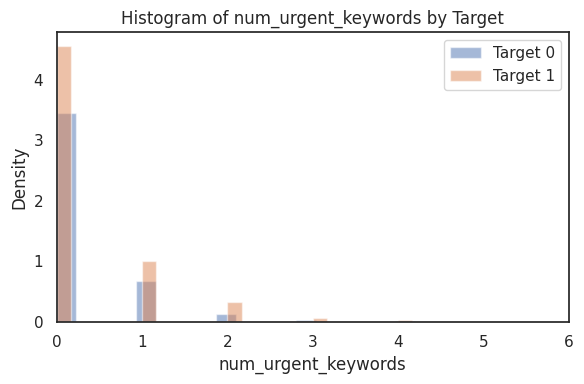

In [ ]:
column = 'num_urgent_keywords'

mp.figure(figsize=(6, 4))
mp.xlim(0,6)
mp.hist(data[data['label'] == 0][column], bins=30, alpha=0.5, label='Target 0', density=True)
mp.hist(data[data['label'] == 1][column], bins=30, alpha=0.5, label='Target 1', density=True)
mp.title(f'Histogram of {column} by Target')
mp.xlabel(column)
mp.ylabel('Density')
mp.legend()
mp.tight_layout()
mp.show()

## Correlation Plot

In [ ]:
x=data.drop('label',axis=1)
y=data['label']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

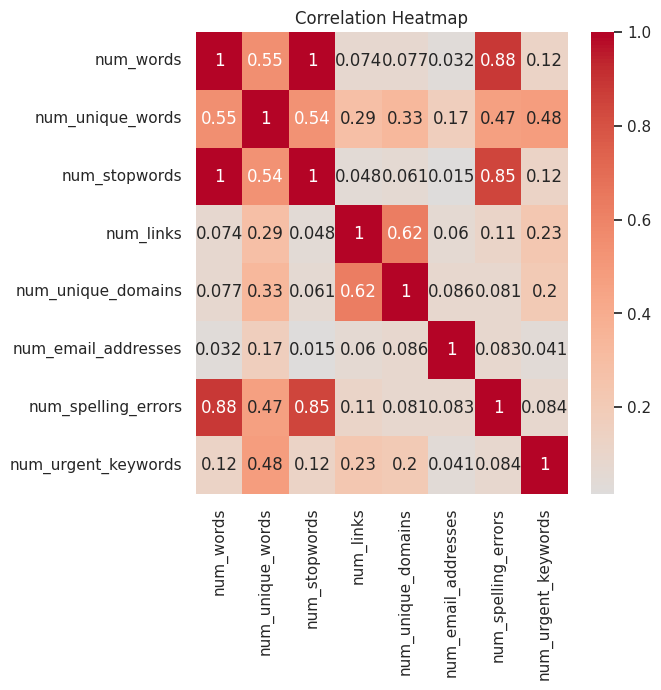

In [ ]:
mp.figure(figsize=(6, 6))
corr = x.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
mp.title('Correlation Heatmap')
mp.show()

## Feature's correelation with target value

In [ ]:
corr_target = data.corr()['label'].sort_values(ascending=False)
print(corr_target)

label                  1.000000
num_urgent_keywords    0.018400
num_unique_words       0.003038
num_stopwords         -0.000491
num_words             -0.001045
num_spelling_errors   -0.002059
num_unique_domains    -0.002524
num_links             -0.009757
num_email_addresses   -0.016519
Name: label, dtype: float64


## Feature importance

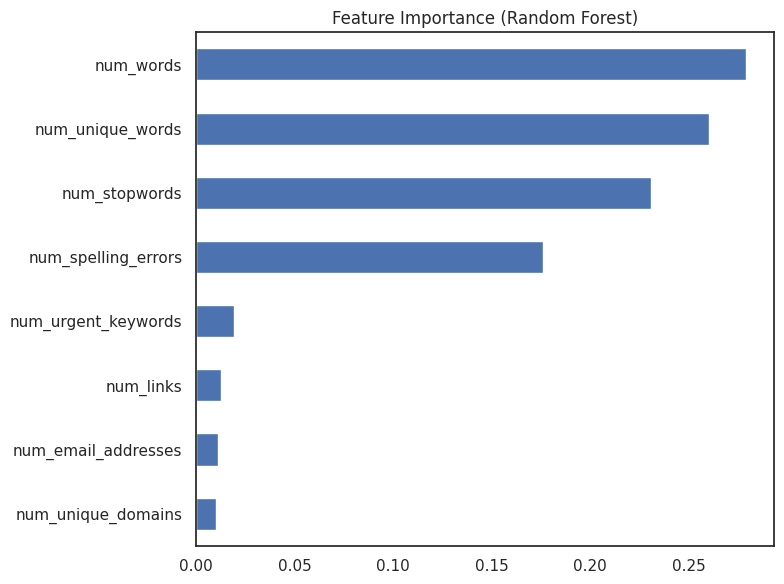

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train, y_train)

importances = pd.Series(model.feature_importances_, index=x.columns)
importances.sort_values().plot(kind='barh', figsize=(8, 6))
mp.title('Feature Importance (Random Forest)')
mp.tight_layout()
mp.show()

In [ ]:
data['label'].value_counts(normalize=True)

,proportion
label,
0,0.98676
1,0.01324


Data is highly imbalanced with "True"(1) labels in the minority and "False" (0) labels in majority

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(x_train)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

[[414274     42]
 [   578   4982]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    414316
           1       0.99      0.90      0.94      5560

    accuracy                           1.00    419876
   macro avg       1.00      0.95      0.97    419876
weighted avg       1.00      1.00      1.00    419876



In [ ]:
y_pred = model.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[103498     83]
 [  1013    376]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    103581
           1       0.82      0.27      0.41      1389

    accuracy                           0.99    104970
   macro avg       0.90      0.63      0.70    104970
weighted avg       0.99      0.99      0.99    104970



for class 1;

Precision : Out of all the spam mails predicted, what percentage is truly spam. (needs to be higher.. )

Recall : Out of the total spams known, what percentage are predicted spam. It is the same as TPR (true positive rate) . (This also needs to be higher)

Why lower precision is acceptable here.

If a few non-phishing emails are wrongly classified as phishing (false positives), they go to a spam folder and can be recovered.

Users can review spam folders, but they can’t unclick a malicious link.



# Oversampling

## SMOTE oversampling

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=0)
x_train_sm, y_train_sm = sm.fit_resample(x_train, y_train)

In [ ]:
from collections import Counter
print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_sm))

Before SMOTE: Counter({0: 414316, 1: 5560})
After SMOTE: Counter({0: 414316, 1: 414316})


In [ ]:
model = RandomForestClassifier()
model.fit(x_train_sm, y_train_sm)

RandomForestClassifier()

### SMOTE test dataset reults

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred_sm = model.predict(x_test)

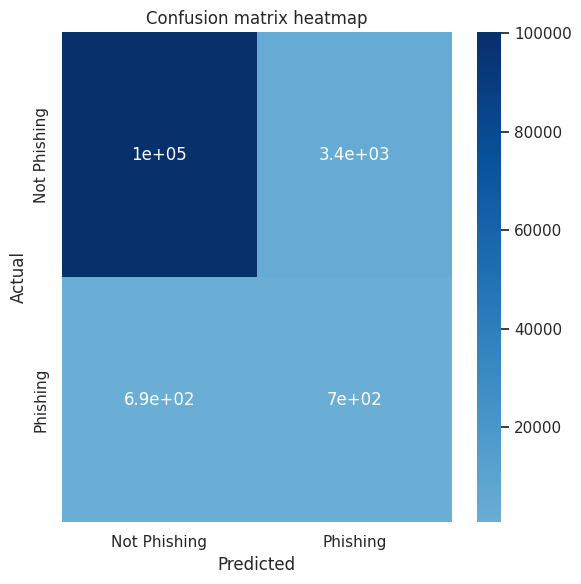

In [ ]:
mp.figure(figsize=(6, 6))
sns.set(style='white')
cm=confusion_matrix(y_test,y_pred_sm)
sns.heatmap(cm, annot=cm, cmap='Blues', center=0,xticklabels=['Not Phishing', 'Phishing'],yticklabels=['Not Phishing', 'Phishing'])
mp.title('Confusion matrix heatmap')
mp.xlabel('Predicted')
mp.ylabel('Actual')
mp.tight_layout()
mp.show()

In [ ]:
print(classification_report(y_test, y_pred_sm))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98    103581
           1       0.17      0.50      0.25      1389

    accuracy                           0.96    104970
   macro avg       0.58      0.73      0.62    104970
weighted avg       0.98      0.96      0.97    104970



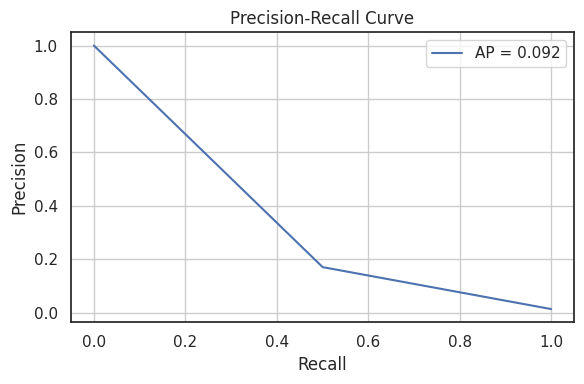

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision_sm, recall_sm, thresholds_sm = precision_recall_curve(y_test, y_pred_sm)
ap = average_precision_score(y_test, y_pred_sm)

mp.figure(figsize=(6, 4))
mp.plot(recall_sm, precision_sm, label=f'AP = {ap:.3f}')
mp.xlabel('Recall')
mp.ylabel('Precision')
mp.title('Precision-Recall Curve')
mp.legend()
mp.grid()
mp.tight_layout()
mp.show()


## ADASYN oversampling

In [ ]:
from imblearn.over_sampling import ADASYN

adasyn = ADASYN(random_state=0)
x_train_ad, y_train_ad = adasyn.fit_resample(x_train, y_train)

In [ ]:
from collections import Counter
print("Before ADASYN:", Counter(y_train))
print("After ADASYN:", Counter(y_train_ad))

Before ADASYN: Counter({0: 414316, 1: 5560})
After ADASYN: Counter({0: 414316, 1: 413843})


In [ ]:
model = RandomForestClassifier()
model.fit(x_train_ad, y_train_ad)

RandomForestClassifier()

### ADASYN test dataset reults

In [ ]:
y_pred_ad = model.predict(x_test)
print(classification_report(y_test, y_pred_ad))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    103581
           1       0.35      0.29      0.31      1389

    accuracy                           0.98    104970
   macro avg       0.67      0.64      0.65    104970
weighted avg       0.98      0.98      0.98    104970



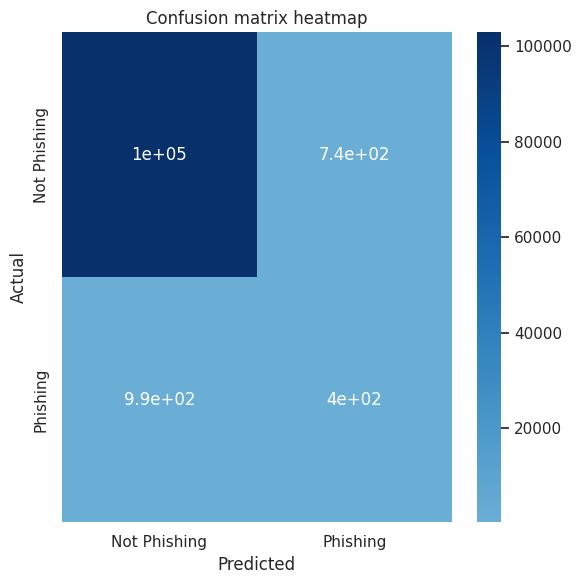

In [ ]:
mp.figure(figsize=(6, 6))
sns.set(style='white')
cm=confusion_matrix(y_test,y_pred_ad)
sns.heatmap(cm, annot=cm, cmap='Blues', center=0,xticklabels=['Not Phishing', 'Phishing'],yticklabels=['Not Phishing', 'Phishing'])
mp.title('Confusion matrix heatmap')
mp.xlabel('Predicted')
mp.ylabel('Actual')
mp.tight_layout()
mp.show()

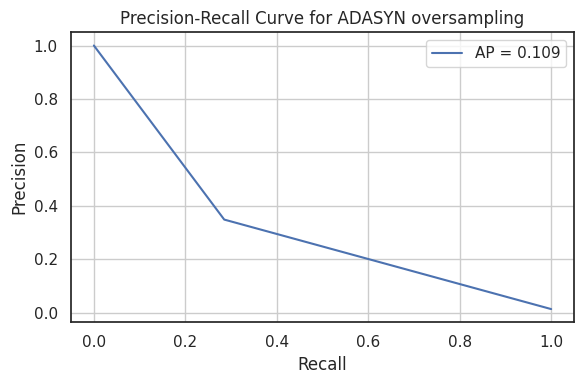

In [ ]:
precision_ad, recall_ad, thresholds_ad = precision_recall_curve(y_test, y_pred_ad)
ap = average_precision_score(y_test, y_pred_ad)

mp.figure(figsize=(6, 4))
mp.plot(recall_ad, precision_ad, label=f'AP = {ap:.3f}')
mp.xlabel('Recall')
mp.ylabel('Precision')
mp.title('Precision-Recall Curve for ADASYN oversampling')
mp.legend()
mp.grid()
mp.tight_layout()
mp.show()


# Class Balanced Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(class_weight='balanced', random_state=0)
model.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=0)

## Class Balanced test result

In [ ]:
y_pred_cb = model.predict(x_test)
print(classification_report(y_test, y_pred_cb))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    103581
           1       0.35      0.29      0.31      1389

    accuracy                           0.98    104970
   macro avg       0.67      0.64      0.65    104970
weighted avg       0.98      0.98      0.98    104970



did no better than adasyn for class 1

# Logistic Model


In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(class_weight='balanced', solver='liblinear', random_state=0)
logreg.fit(x_train_ad, y_train_ad)

LogisticRegression(class_weight='balanced', random_state=0, solver='liblinear')

In [ ]:
y_pred_lr = logreg.predict(x_test)
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.47      0.64    103581
           1       0.02      0.81      0.04      1389

    accuracy                           0.48    104970
   macro avg       0.51      0.64      0.34    104970
weighted avg       0.98      0.48      0.63    104970



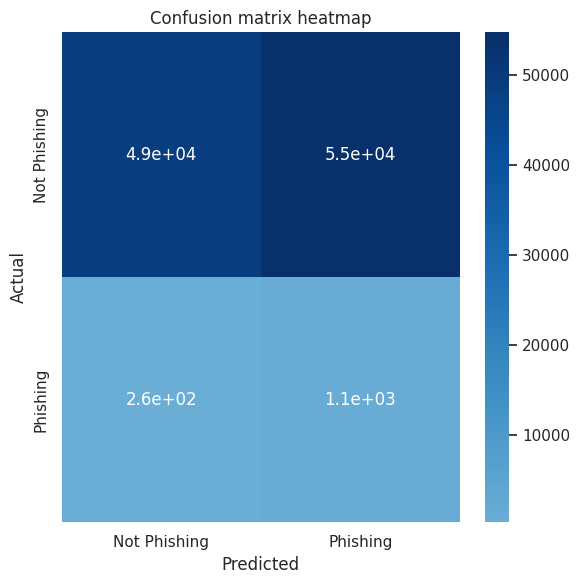

In [ ]:
mp.figure(figsize=(6, 6))
sns.set(style='white')
cm=confusion_matrix(y_test,y_pred_lr)
sns.heatmap(cm, annot=cm, cmap='Blues', center=0,xticklabels=['Not Phishing', 'Phishing'],yticklabels=['Not Phishing', 'Phishing'])
mp.title('Confusion matrix heatmap')
mp.xlabel('Predicted')
mp.ylabel('Actual')
mp.tight_layout()
mp.show()

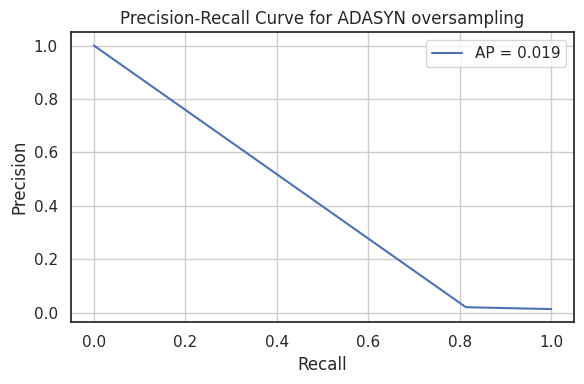

In [ ]:
precision_lr, recall_lr, thresholds_lr = precision_recall_curve(y_test, y_pred_lr)
ap = average_precision_score(y_test, y_pred_lr)

mp.figure(figsize=(6, 4))
mp.plot(recall_lr, precision_lr, label=f'AP = {ap:.3f}')
mp.xlabel('Recall')
mp.ylabel('Precision')
mp.title('Precision-Recall Curve for ADASYN oversampling')
mp.legend()
mp.grid()
mp.tight_layout()
mp.show()